### Работу выполнила Кордзахия Натела БЭК181

# <center> Экзамен по "Науке о данных" </center>

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [18]:
# импорт модулей
import numpy as np
import pandas as pd

from scipy import stats # more style :)

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

Пункт 1

In [29]:
np.random.seed(100)

In [30]:
r = 0 + np.random.normal(0, 1, 1000)
vr = np.cumsum(r)

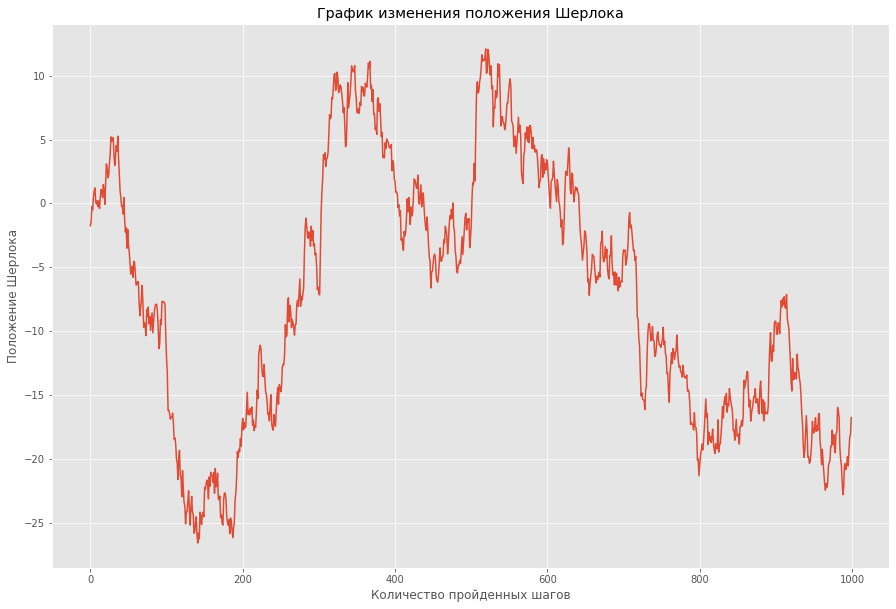

In [31]:
plt.figure(figsize=(15, 10))
plt.xlabel('Количество пройденных шагов')
plt.ylabel('Положение Шерлока')
plt.title('График изменения положения Шерлока')
plt.plot(vr);

Пункт 2

In [32]:
var = []
mean = []
for i in range(1, 1001):
    var.append(np.var(r[:i]))
    mean.append(np.mean(r[:i]))

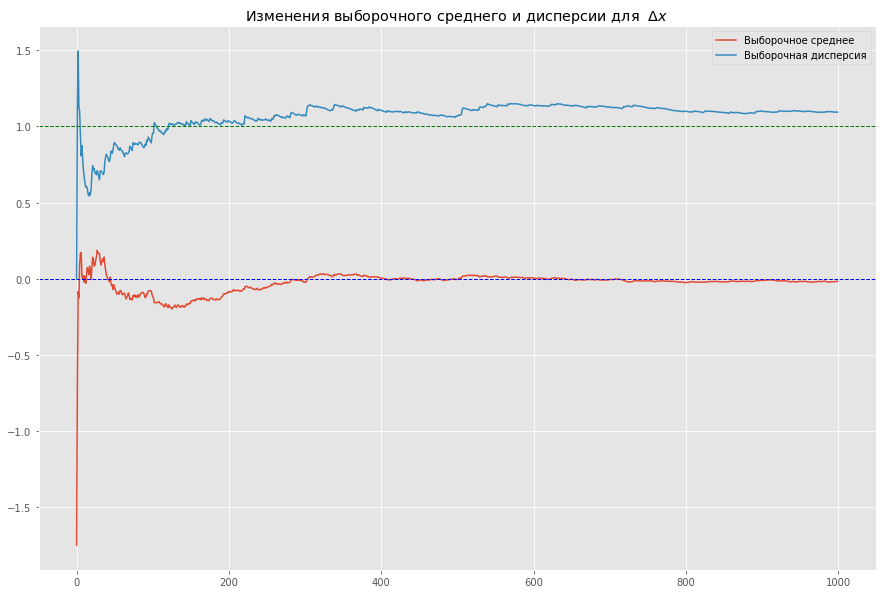

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(mean, label = 'Выборочное среднее');
plt.plot(var, label = 'Выборочная дисперсия');
plt.title('Изменения выборочного среднего и дисперсии для  $\Delta x$')
plt.axhline(0, color='b', linestyle='dashed', linewidth=1);
plt.axhline(1, color='g', linestyle='dashed', linewidth=1);
plt.legend();

Пункт 3

In [7]:
np.random.seed(100)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


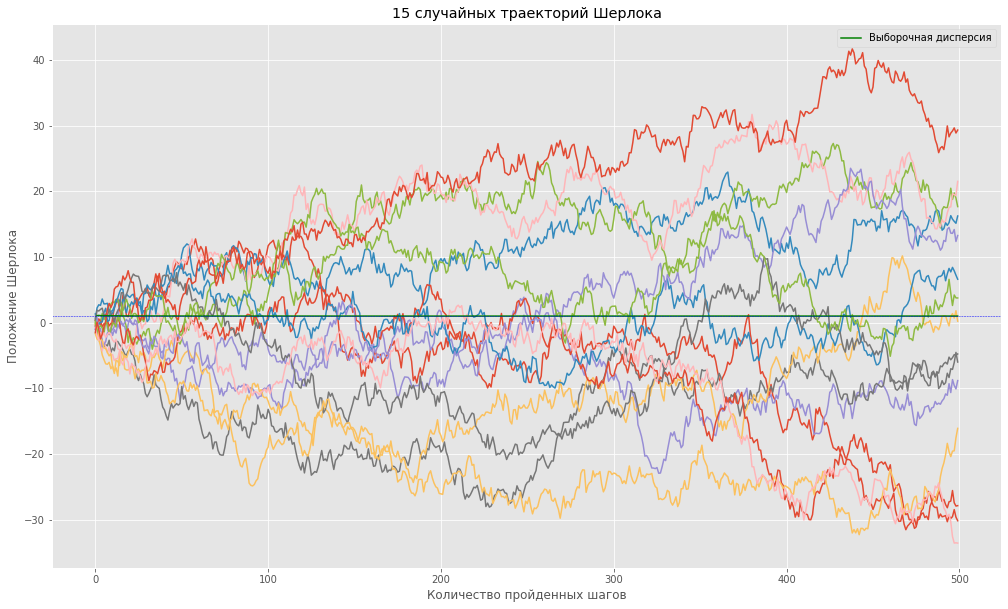

In [8]:
def task():
    r = 0 + np.random.normal(0, 1, size=(1000, 500))
    vr = np.cumsum(r, axis=1)
       
    df = pd.DataFrame(vr[list(np.random.choice(1000, 15)), :].transpose())
    x = df.index
    plt.figure(figsize=(17, 10))
    for i in range(15):
        plt.plot(x, df[i])
    plt.xlabel('Количество пройденных шагов')
    plt.ylabel('Положение Шерлока')
    plt.title('15 случайных траекторий Шерлока')
    # добавим дисперсию
    varr = []
    for i in range(500):
        k = np.var(r[:i])
        varr.append(k.mean())
    plt.plot(x, varr, color = 'g', label='Выборочная дисперсия')
    plt.axhline(1, color = 'b', linestyle='dashed', linewidth=0.5);
    plt.legend()
    plt.show()
    pass
task()

In [9]:
r = 0 + np.random.normal(0, 1, size=(1000, 500))
varr = []
for i in range(500):
    s = np.var(r[:i])
    varr.append(s.mean())
varr #проверка дисперсии

[nan,
 0.9431774095384821,
 0.950113678981354,
 0.9901466613680835,
 0.979817324618785,
 0.976744195124146,
 0.9859043281669068,
 0.987798050740508,
 1.0084256265864477,
 1.0193591893521932,
 1.0129045444231906,
 1.009331436575062,
 1.0083994721078235,
 1.0065396445525567,
 1.007353773524761,
 1.0048545356721723,
 0.9978203886161765,
 1.0031382639704511,
 1.0069590495010137,
 1.0081802432793243,
 1.007696251840173,
 1.0090914234994233,
 1.0118670103213274,
 1.0107766422868132,
 1.0079397194046966,
 1.0045586347799482,
 1.003087305659591,
 1.003961638335398,
 1.0032959965378758,
 1.0047119044381103,
 1.0048219978520154,
 1.007016415460858,
 1.0063013253525988,
 1.0043221190002143,
 1.005021793255865,
 1.004561397039009,
 1.005693213234893,
 1.0065709870901363,
 1.0061105432716673,
 1.0045051469254043,
 1.007075655581069,
 1.0058625351120143,
 1.004698198948031,
 1.0039087730426959,
 1.004454994131758,
 1.0022291951151847,
 1.0017220186208067,
 1.0022978566601068,
 1.0010241783688236,
 1

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]

In [10]:
df = pd.read_csv('data.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


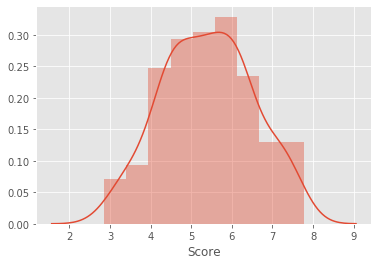

In [11]:
sns.distplot(df['Score']);

In [12]:
stats.kstest(df['Score'], 'norm', (df['Score'].mean(), df['Score'].std())) 

KstestResult(statistic=0.05780215493783658, pvalue=0.67901967389003)

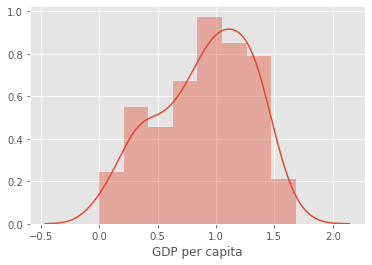

In [13]:
sns.distplot(df['GDP per capita']);